Step 1: Let's build a comprehensive breast cancer detection project using various machine learning models,
and compare their performance using different visualization techniques like graphs,
charts, bar plots, and heat maps.
We'll use Python libraries such as Pandas, NumPy, Matplotlib, Seaborn, and Scikit-learn.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\analytics\bcd.csv")


In [5]:
# Display the first few rows of the dataset

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Explanation: We begin by importing the pandas library for data manipulation. We then load the dataset from the specified file path into a DataFrame called df. The head() function displays the first five rows of the DataFrame to give an initial look at the data.


In [60]:
# Display dataset summary

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 6 to 566
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                398 non-null    int64  
 1   radius_mean              398 non-null    float64
 2   texture_mean             398 non-null    float64
 3   perimeter_mean           398 non-null    float64
 4   area_mean                398 non-null    float64
 5   smoothness_mean          398 non-null    float64
 6   compactness_mean         398 non-null    float64
 7   concavity_mean           398 non-null    float64
 8   concave points_mean      398 non-null    float64
 9   symmetry_mean            398 non-null    float64
 10  fractal_dimension_mean   398 non-null    float64
 11  radius_se                398 non-null    float64
 12  texture_se               398 non-null    float64
 13  perimeter_se             398 non-null    float64
 14  area_se                  398 no




Explanation: The info() method provides a concise summary of the DataFrame, including the number of non-null entries in each column and the data types of the columns. This helps identify any missing values and understand the structure of the dataset.


In [8]:
# Statistical summary

df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Explanation: The describe() method generates descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution, excluding NaN values.


In [9]:
df.shape

(569, 33)

In [11]:
#We can see that there are 569 instances and 33 variables in the data set.


In [12]:
df.duplicated().sum()

0

In [14]:
#We can observe that there are no duplicate values in the dataset.


In [70]:
# Check for any missing values

df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Explanation: We use isnull().sum() to check for missing values in each column. This helps identify any columns that might need imputation or cleaning.


####
Step 2: Exploratory Data Analysis (EDA)

Distribution of Target Variable

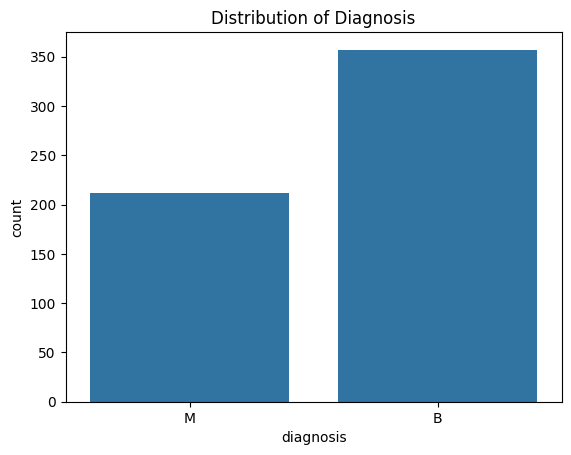

In [9]:
# Distribution of target variable
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.show()

Explanation: We use seaborn and matplotlib for visualization. The countplot() function creates a bar plot that shows the count of each unique value in the 'diagnosis' column, helping us understand the class distribution in the target variable.


Correlation Heatmap

In [15]:
# Encode the target variable

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

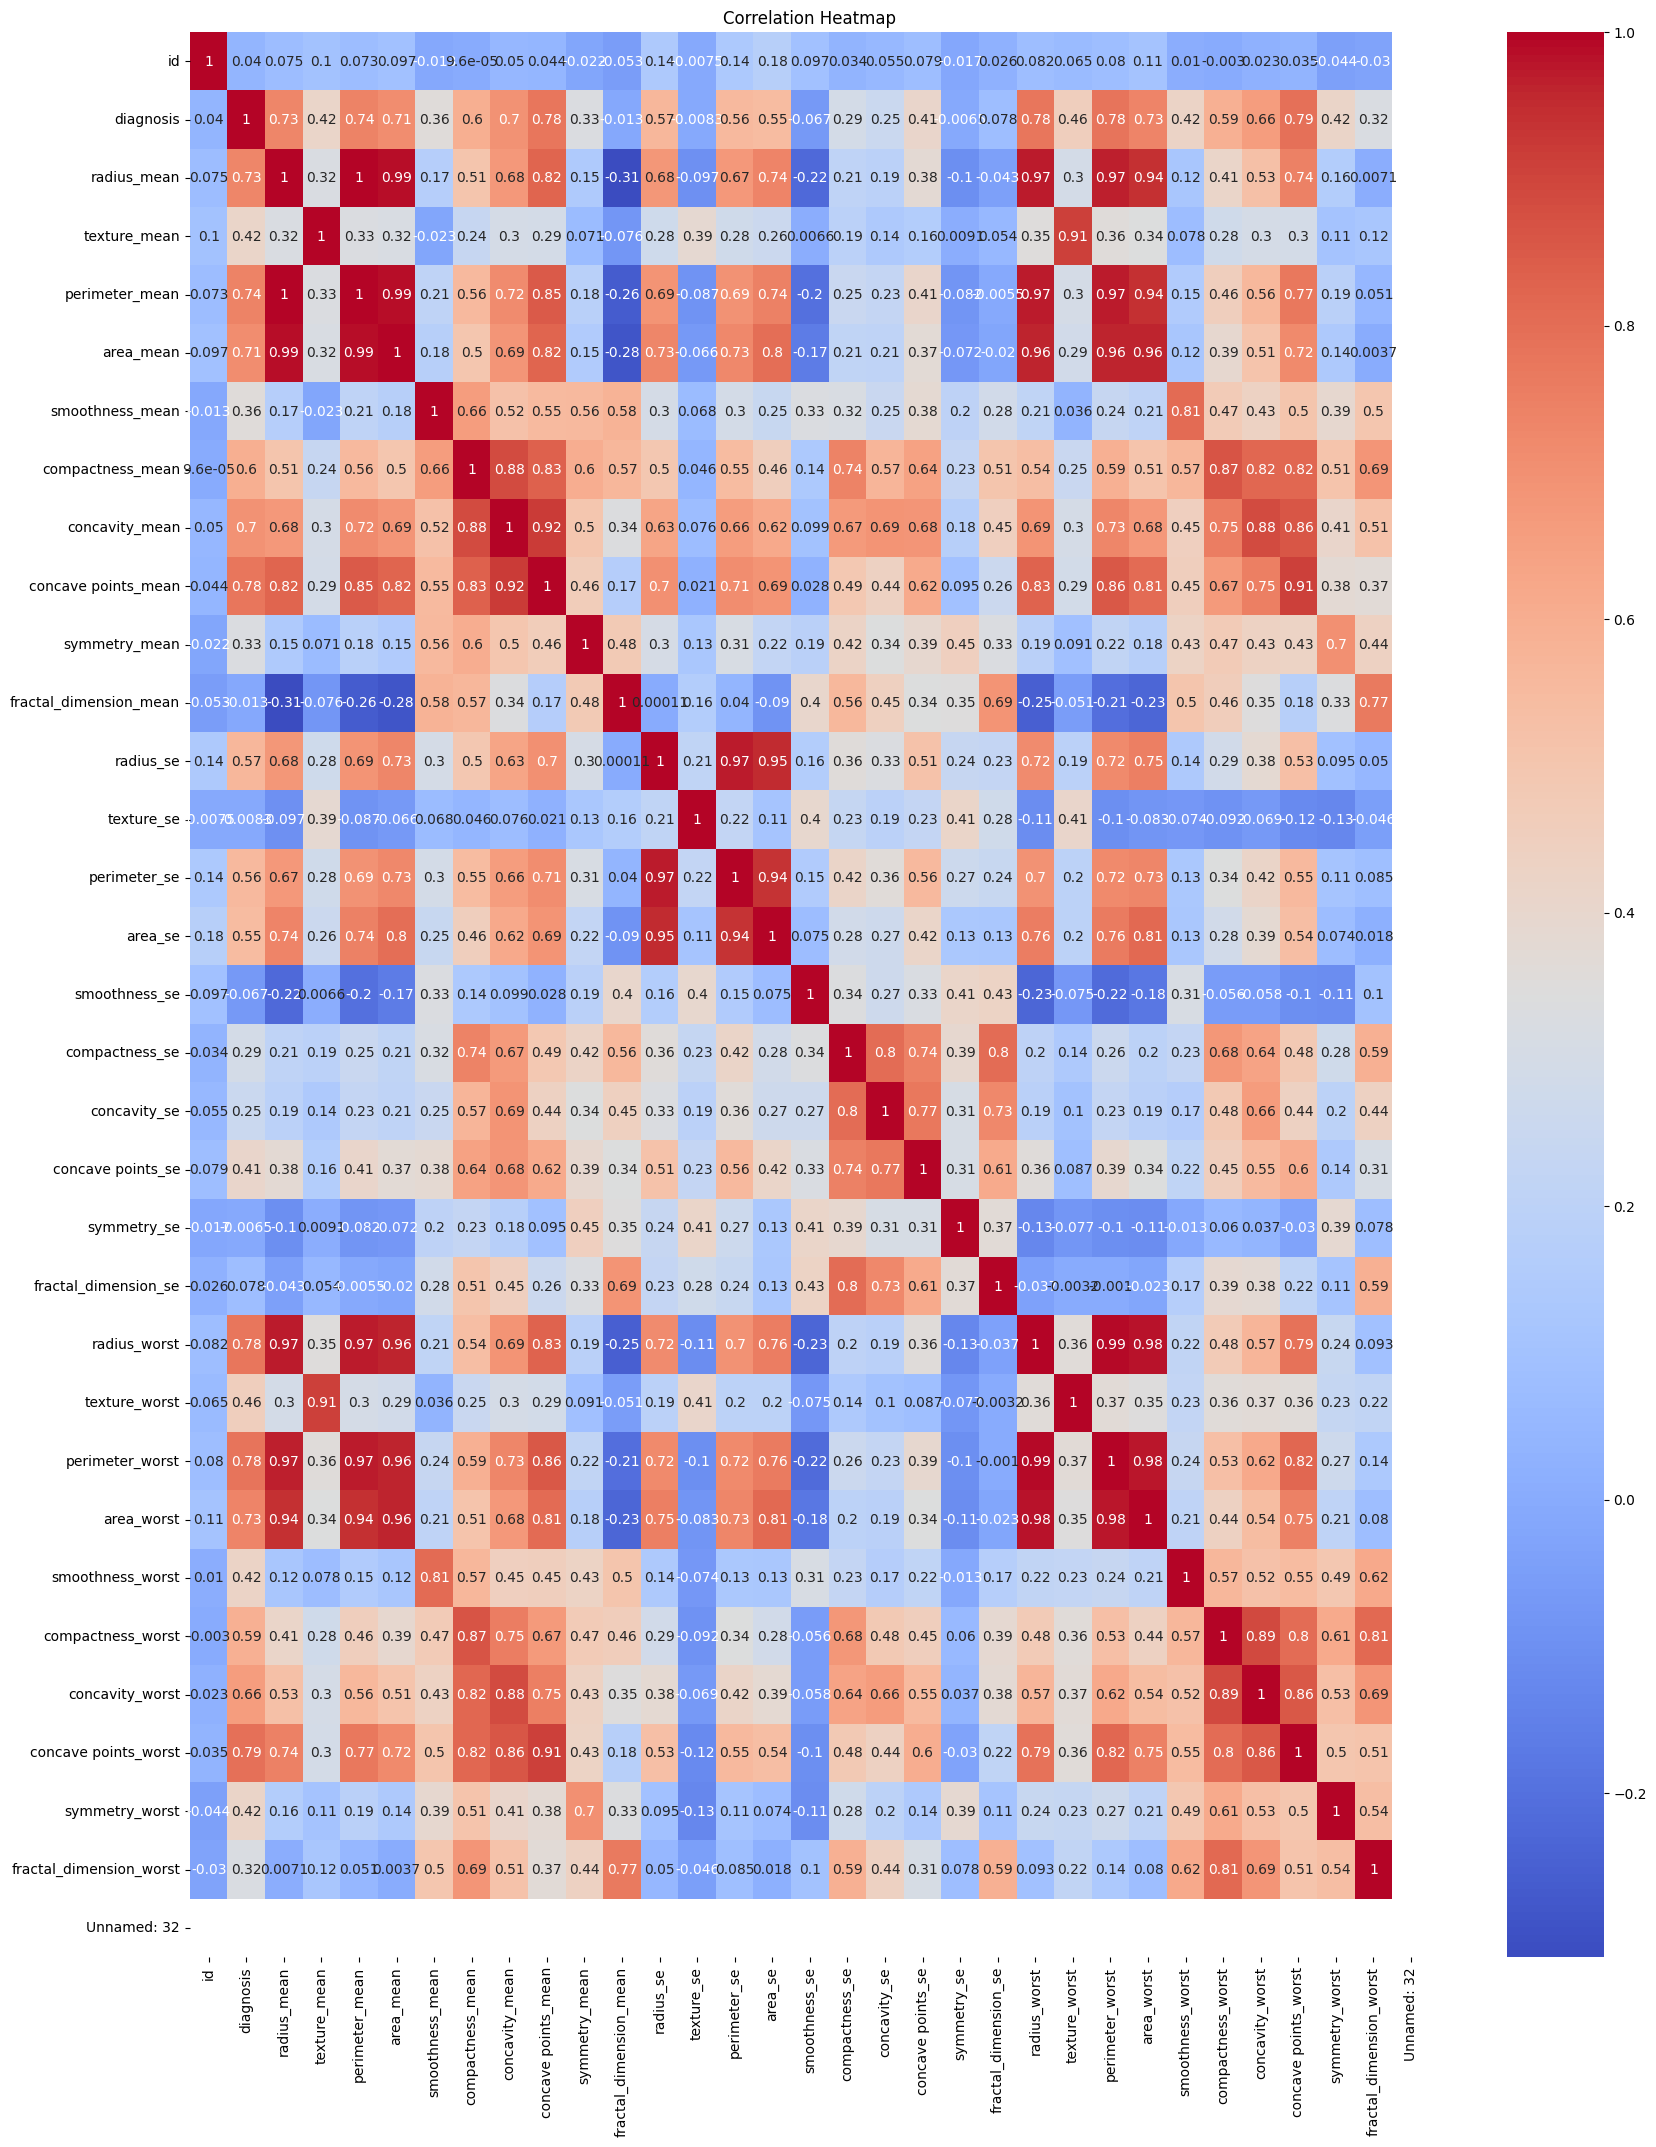

In [16]:
# Correlation heatmap

plt.figure(figsize=(20, 25))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Explanation: The target variable 'diagnosis' is encoded to numerical values ('M' for malignant as 1, and 'B' for benign as 0) for correlation analysis. A heatmap of the correlation matrix is then plotted to visualize the relationships between all numerical features. The annot=True argument adds the correlation coefficient values to the heatmap.


Identify Columns Related to Target Column

In [17]:
# Find correlations with the target column

correlations = df.corr()['diagnosis'].sort_values(ascending=False)
print(correlations)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

Explanation: This block calculates and sorts the correlation coefficients of all features with respect to the target variable 'diagnosis'. This helps identify which features are most strongly correlated with the target.


Pairplot for Relationships

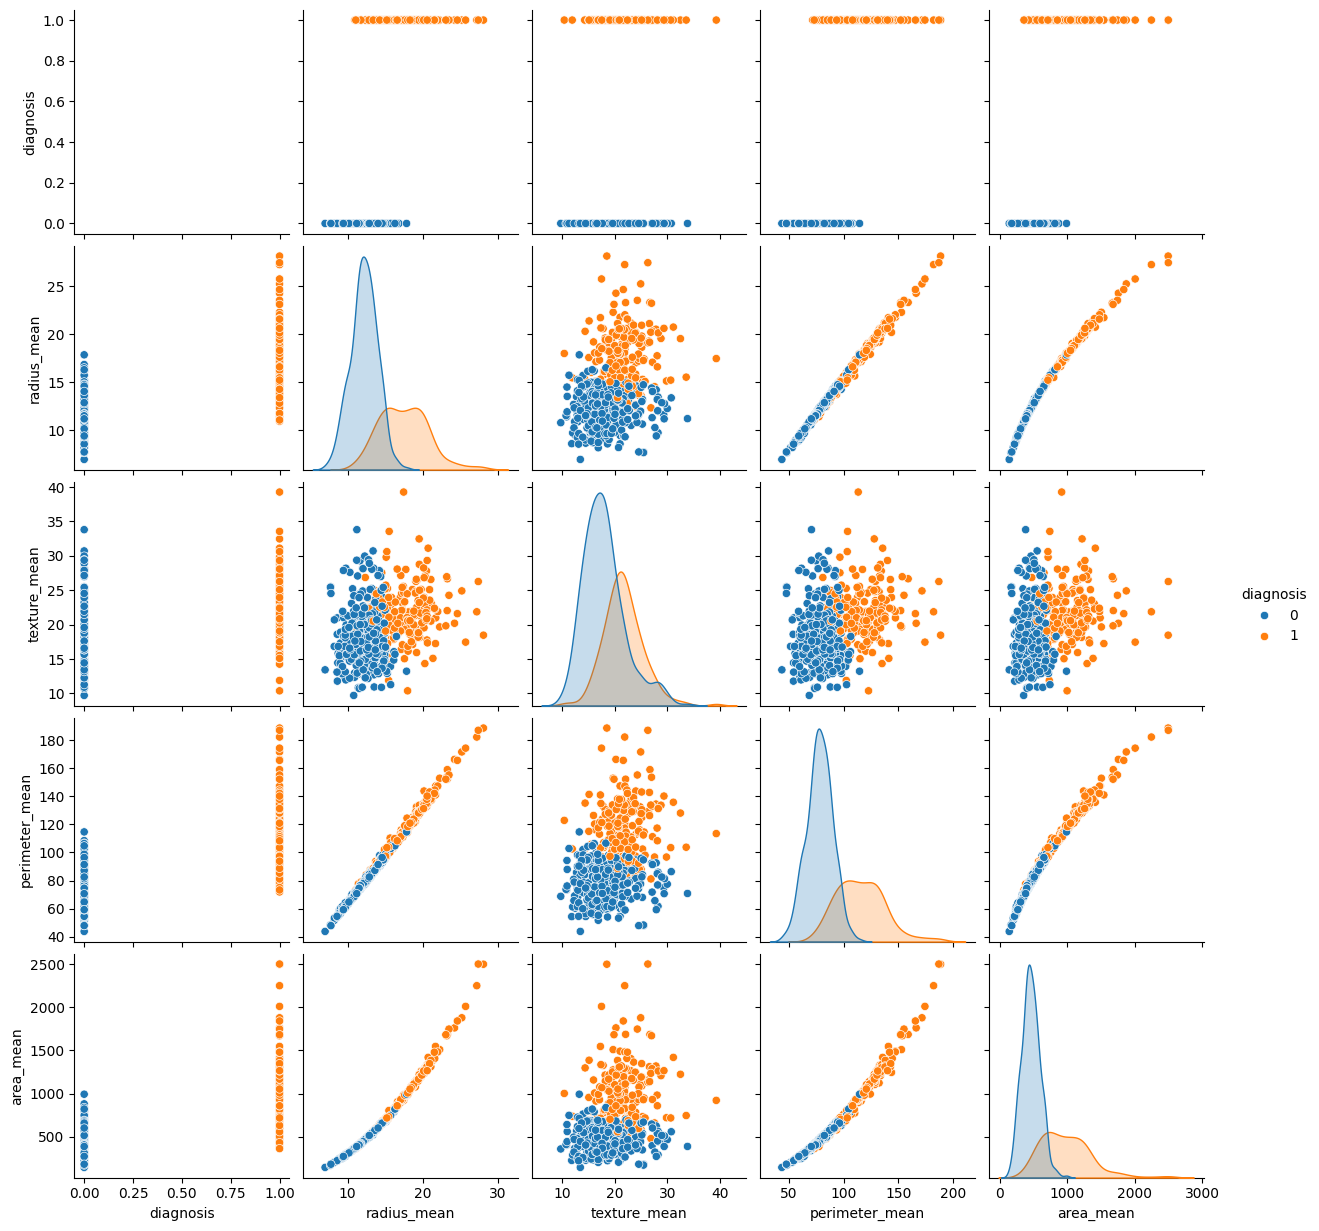

In [18]:
# Pairplot for relationships

sns.pairplot(df, hue='diagnosis', vars=df.columns[1:6])  
plt.show()

Explanation: A pairplot is created to visualize the pairwise relationships between the features. The hue argument is used to color the points by the 'diagnosis' column, making it easier to distinguish between the classes.


####
Step 3: Data Preprocessing

Prepare the data for machine learning models by encoding categorical variables, handling missing values, and scaling the features.

In [19]:
# Drop the 'id' column and any unnamed columns

df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

In [20]:
# Define features and target

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


In [55]:
X.shape

(569, 30)

In [56]:
y.shape

(569,)

In [21]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X_train.shape

(455, 30)

In [58]:
X_test.shape

(114, 30)

In [22]:
# Standardize the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Explanation:
The 'id' column is dropped as it is not useful for modeling.
Features (X) and target (y) variables are defined.
The dataset is split into training and testing sets using train_test_split with a test size of 20%.
The features are standardized using StandardScaler to ensure that all features have a mean of 0 and a standard deviation of 1, which is important for many machine learning algorithms.

####
Step 4: Outlier Detection and Removal

We'll identify and remove outliers from the dataset.

Check for Outliers

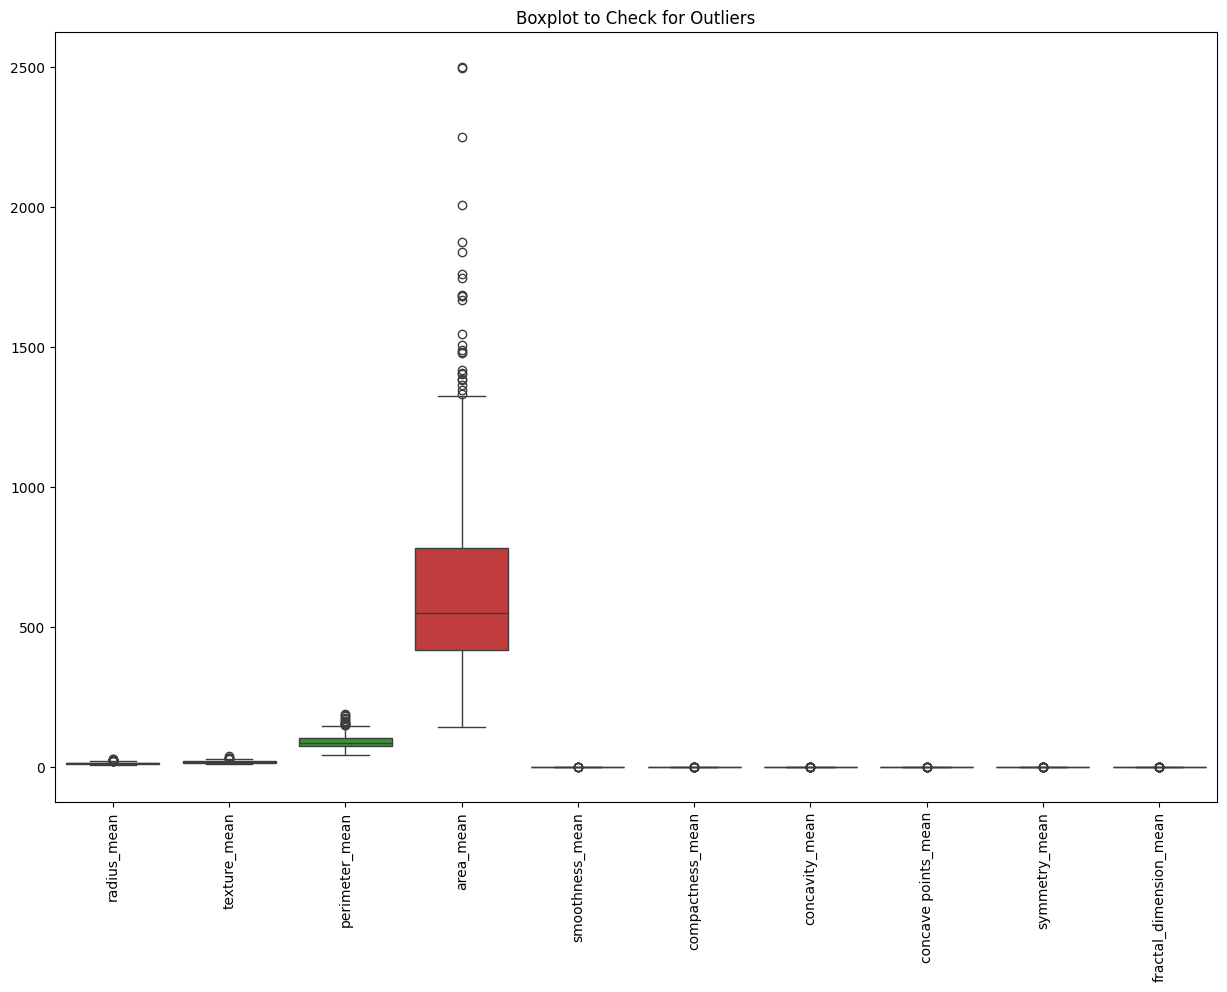

In [23]:
# Boxplot to check for outliers

plt.figure(figsize=(15, 10))
sns.boxplot(data=df[df.columns[1:11]])
plt.xticks(rotation=90)
plt.title('Boxplot to Check for Outliers')
plt.show()

Explanation: A boxplot is plotted for the first 10 columns to visually inspect for outliers. Boxplots display the distribution of data and highlight any potential outliers as points outside the whiskers.


Remove Outliers

We'll remove outliers based on the Interquartile Range (IQR) method.



In [24]:
# Remove outliers using IQR

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [25]:
# Filter out the outliers

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

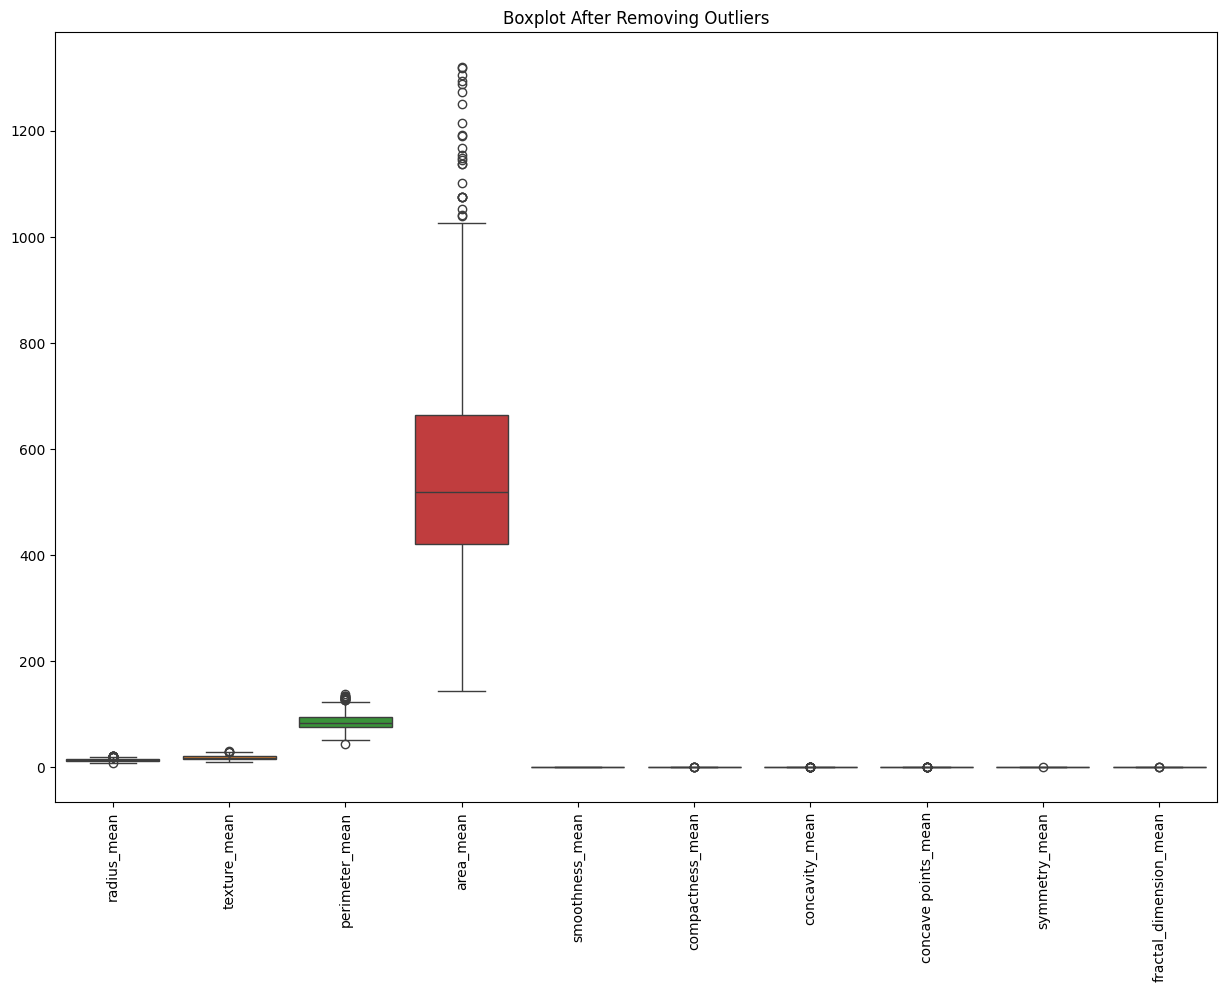

In [26]:
# Verify the removal of outliers

plt.figure(figsize=(15, 10))
sns.boxplot(data=df[df.columns[1:11]])
plt.xticks(rotation=90)
plt.title('Boxplot After Removing Outliers')
plt.show()

Explanation:
Outliers are identified and removed using the Interquartile Range (IQR) method.
Rows with values outside 1.5 times the IQR from the first and third quartiles are considered outliers and removed.
A new boxplot is plotted to verify the removal of outliers.

####
Step 5: Model Training and Evaluation (Supervised Learning)

We'll train several supervised learning models and evaluate their performance.



####
Random Forest Classifier

The Random Forest Classifier constructs multiple decision trees independently and combines their predictions
through averaging¶


In [27]:
# Train the Random Forest model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [28]:
# Make predictions

y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

In [29]:
# Evaluate the model

accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest ROC-AUC: {roc_auc_rf:.2f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.96
Random Forest ROC-AUC: 1.00
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



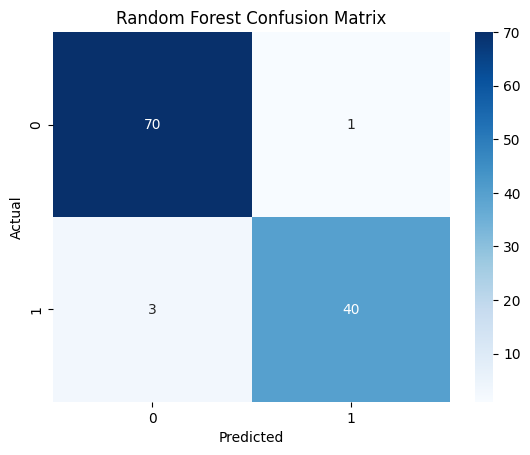

In [30]:
# Confusion matrix for Random Forest

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

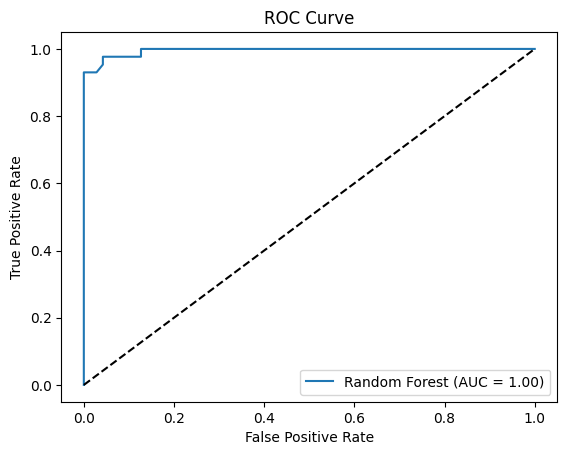

In [31]:
# ROC curve for Random Forest

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Explanation:
The RandomForestClassifier is used to train the model with 100 trees.
Predictions and probabilities are obtained for the test set.
The model is evaluated using accuracy, ROC-AUC score, and a classification report.
The confusion matrix and ROC curve are plotted to visualize the performance.


Support Vector Machine (SVM)

Using Support Vector Machine can handle outliers by paying attention to the general patterns in the data and 
not letting individual unusual points have too much influence.


In [32]:
# Train the SVM model

svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [33]:
# Make predictions

y_pred_svm = svm_model.predict(X_test)
y_pred_svm_proba = svm_model.predict_proba(X_test)[:, 1]


In [34]:
# Evaluate the model

accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm_proba)
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"SVM ROC-AUC: {roc_auc_svm:.2f}")
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.96
SVM ROC-AUC: 1.00
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



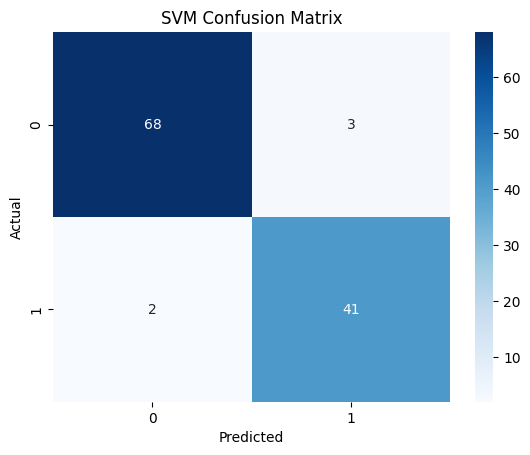

In [35]:
# Confusion matrix for SVM

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

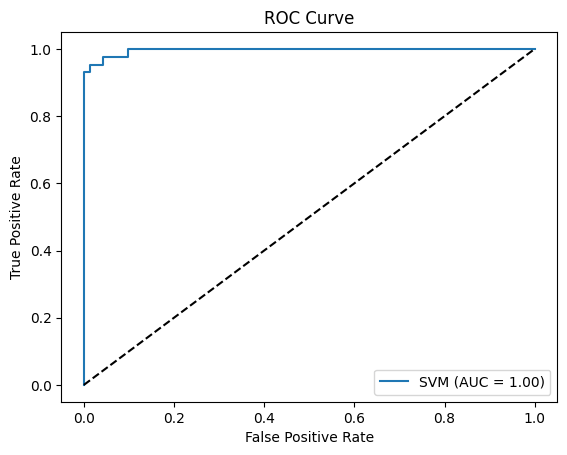

In [36]:
# ROC curve for SVM

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm_proba)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Explanation:
The SVC with a linear kernel is used to train the model.
Predictions and probabilities are obtained for the test set.
The model is evaluated using accuracy, ROC-AUC score, and a classification report.
The confusion matrix and ROC curve are plotted to visualize the performance.

####
Logistic Regression

In [37]:
# Train the Logistic Regression model

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)


LogisticRegression()

In [38]:
# Make predictions

y_pred_lr = lr_model.predict(X_test)
y_pred_lr_proba = lr_model.predict_proba(X_test)[:, 1]


In [39]:
# Evaluate the model

accuracy_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr_proba)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print(f"Logistic Regression ROC-AUC: {roc_auc_lr:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.97
Logistic Regression ROC-AUC: 1.00
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



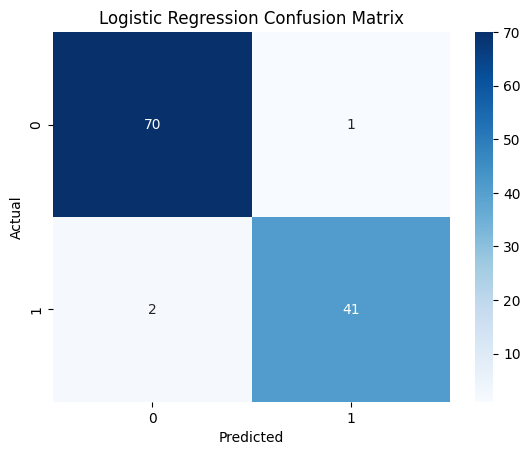

In [40]:
# Confusion matrix for Logistic Regression

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

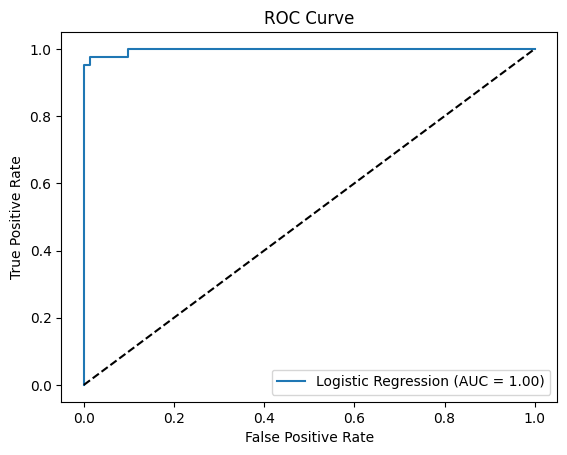

In [41]:
# ROC curve for Logistic Regression

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr_proba)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Explanation:
The LogisticRegression model is trained with a maximum of 10,000 iterations.
Predictions and probabilities are obtained for the test set.
The model is evaluated using accuracy, ROC-AUC score, and a classification report.
The confusion matrix and ROC curve are plotted to visualize the performance.

####
K-Nearest Neighbors (KNN)

In [42]:
# Train the KNN model

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
# Make predictions

y_pred_knn = knn_model.predict(X_test)
y_pred_knn_proba = knn_model.predict_proba(X_test)[:, 1]

In [44]:
# Evaluate the model

accuracy_knn = accuracy_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn_proba)
print(f"KNN Accuracy: {accuracy_knn:.2f}")
print(f"KNN ROC-AUC: {roc_auc_knn:.2f}")
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.95
KNN ROC-AUC: 0.98
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



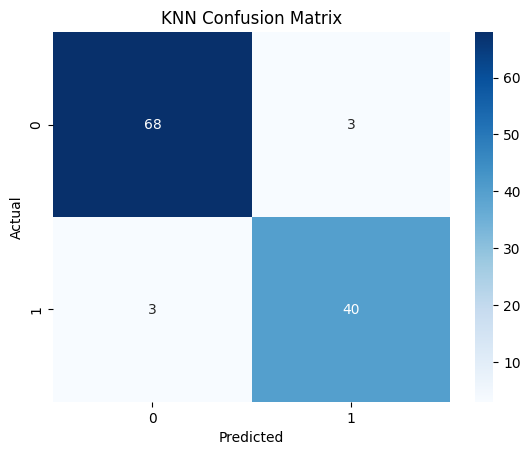

In [45]:
# Confusion matrix for KNN

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

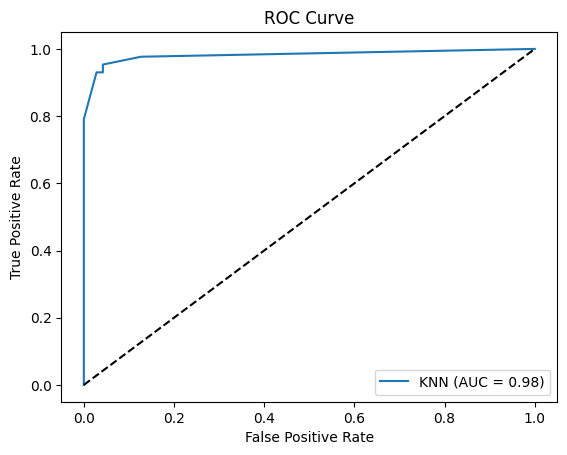

In [46]:
# ROC curve for KNN

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn_proba)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Explanation:
The KNeighborsClassifier model is trained with 5 neighbors.
Predictions and probabilities are obtained for the test set.
The model is evaluated using accuracy, ROC-AUC score, and a classification report.
The confusion matrix and ROC curve are plotted to visualize the performance.

####
AdaBoost Classifier

In [47]:
# Train the AdaBoost model

ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [48]:
# Make predictions

y_pred_ada = ada_model.predict(X_test)
y_pred_ada_proba = ada_model.predict_proba(X_test)[:, 1]

In [49]:
# Evaluate the model

accuracy_ada = accuracy_score(y_test, y_pred_ada)
roc_auc_ada = roc_auc_score(y_test, y_pred_ada_proba)
print(f"AdaBoost Accuracy: {accuracy_ada:.2f}")
print(f"AdaBoost ROC-AUC: {roc_auc_ada:.2f}")
print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_ada))


AdaBoost Accuracy: 0.97
AdaBoost ROC-AUC: 1.00
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



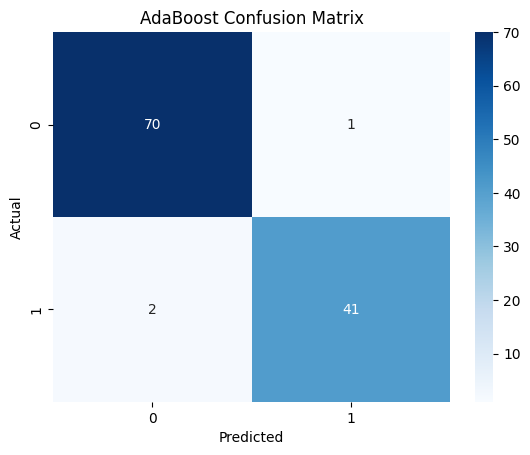

In [50]:
# Confusion matrix for AdaBoost

conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(conf_matrix_ada, annot=True, fmt='d', cmap='Blues')
plt.title('AdaBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


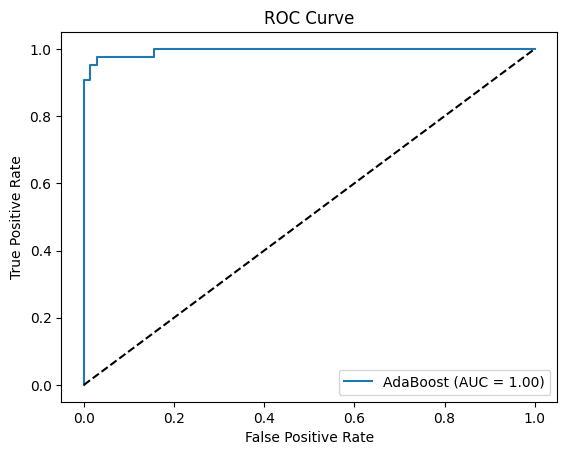

In [51]:
# ROC curve for AdaBoost

fpr_ada, tpr_ada, _ = roc_curve(y_test, y_pred_ada_proba)
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost (AUC = {roc_auc_ada:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Explanation:
The AdaBoostClassifier model is trained with 100 estimators.
Predictions and probabilities are obtained for the test set.
The model is evaluated using accuracy, ROC-AUC score, and a classification report.
The confusion matrix and ROC curve are plotted to visualize the performance.


####
Step 6: Model Comparison

We'll compare the performance of all the trained models.

In [52]:
# Model comparison

models = ['Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'AdaBoost']
accuracies = [accuracy_rf, accuracy_svm, accuracy_lr, accuracy_knn, accuracy_ada]
roc_aucs = [roc_auc_rf, roc_auc_svm, roc_auc_lr, roc_auc_knn, roc_auc_ada]

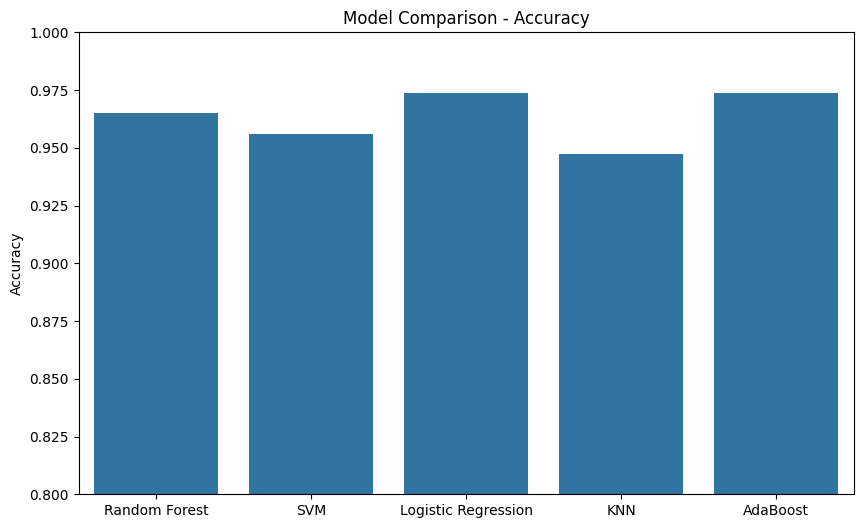

In [53]:
# Accuracy comparison

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.show()

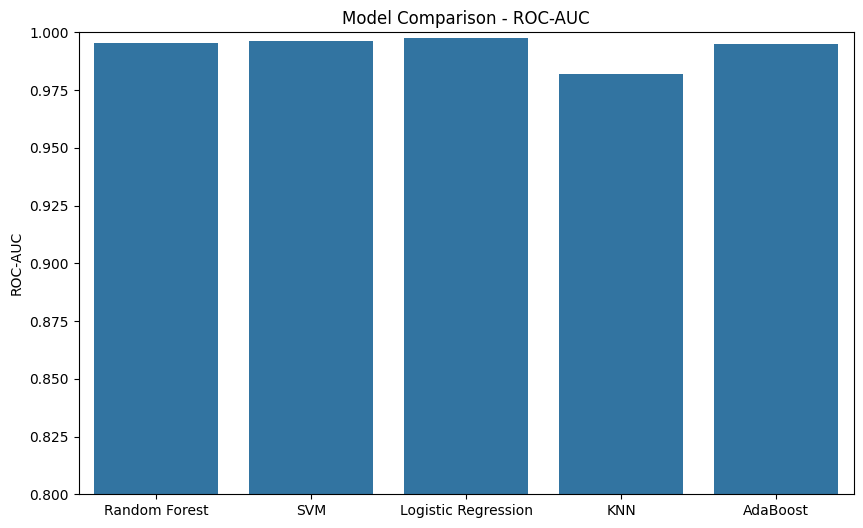

In [54]:
# ROC-AUC comparison

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=roc_aucs)
plt.title('Model Comparison - ROC-AUC')
plt.ylabel('ROC-AUC')
plt.ylim(0.8, 1.0)
plt.show()



Explanation:
A bar plot is created to compare the accuracy of all models.
Another bar plot is created to compare the ROC-AUC scores of all models.
This visual comparison helps identify which model performs best in terms of accuracy and ROC-AUC score.


